**TASK 1**

In [59]:
#Importing two external libraries
import pandas as pd
import glob

#Creating a datapath to access all the files in the price folder
DATA_PATH = 'data/DayAheadPrices_12.1.D/*.csv'

#Defining all the relevant files using glob.glob
# Creating one large dataframe with all the prices across Europe, making sure to seperate the values with '\t' 
# ignoring index to make sure that the dataframe has new unique indexes
files = glob.glob(DATA_PATH)
df_price_all = pd.concat([pd.read_csv(file, sep='\t') for file in files], ignore_index=True)

In [60]:
#Converting the strings in the DateTime column to the datetime format and setting the DateTime column to be the index
df_price_all['DateTime'] = pd.to_datetime(df_price_all['DateTime'])

df_price_all = df_price_all.set_index('DateTime')

In [61]:
#Sorting the dataframe in chronoligial order
df_price_all = df_price_all.sort_index()

In [62]:
#Creating two dataframes containing only the norwegian and german prices, making sure to only use the german hourly values
#(you can check the length of the dataframes to be equal to 43824, 24hours*365days*5years + 24 hours (feb 29th 2020) )
df_price_NO = df_price_all[df_price_all['AreaCode'].str.contains('NO-2', na=False)]

df_price_DE = df_price_all[df_price_all['MapCode'].str.contains('DE_LU', na=False)]
df_price_DE = df_price_DE[df_price_DE['ResolutionCode'].str.contains('60', na=False)]

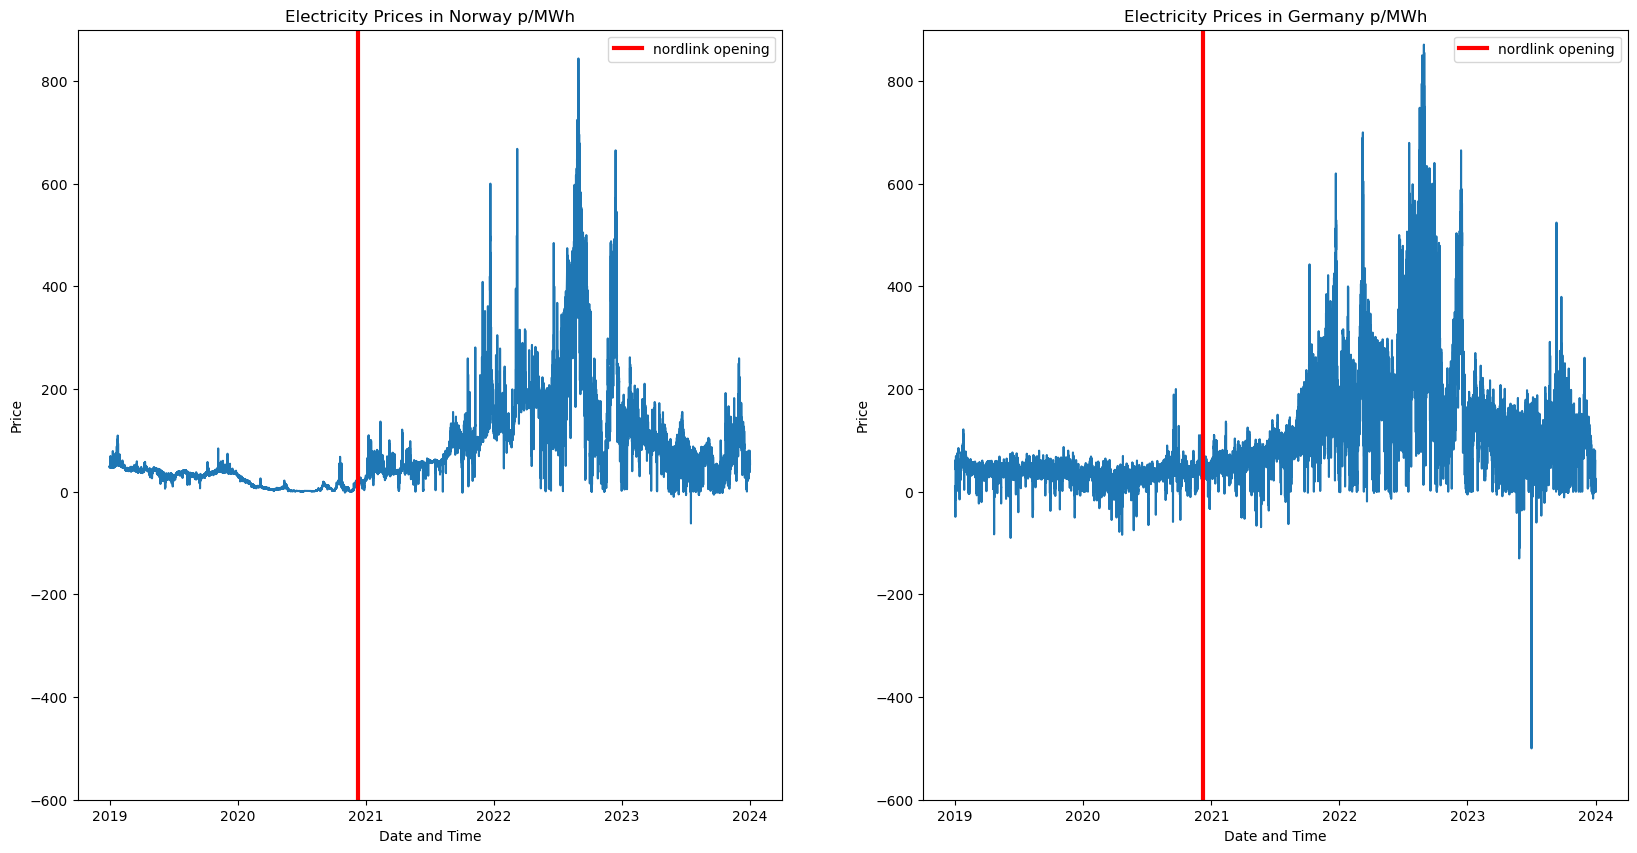

In [63]:
#Importing matplotlib to visualize the data
import matplotlib.pyplot as plt

#defining a new figure with two graphs, with a size of 20x10
fig, ax = plt.subplots(1,2, figsize=(20,10))

#Defining the data and style of graph number 1 (Norway)
ax[0].plot( df_price_NO['Price'], linestyle = '-')
ax[0].set_title('Electricity Prices in Norway p/MWh') 
ax[0].set_xlabel('Date and Time') 
ax[0].set_ylabel('Price')

#Defining the data and style of graph number 1 (Germany)
ax[1].plot(df_price_DE['Price'], linestyle = '-')
ax[1].set_title('Electricity Prices in Germany p/MWh') 
ax[1].set_xlabel('Date and Time') 
ax[1].set_ylabel('Price')

#Making sure that the graphs have the same range, so they are easier to compare visually
ax[0].set_ylim([-600,900])
ax[1].set_ylim([-600,900])

#Defining a variable to the date of NorLinks opening
nordlink_opening_date = pd.to_datetime('2020-12-09')

#Puting a line on the x axis equal to the opening date, styling it, and giving it an explenation in both graphs
ax[0].axvline(nordlink_opening_date, color = 'red',linestyle= '-', linewidth=3, label= 'nordlink opening')
ax[0].legend()

ax[1].axvline(nordlink_opening_date, color = 'red',linestyle= '-', linewidth=3, label= 'nordlink opening')
ax[1].legend()

#Showing the figure
plt.show()

**CONCLUSION OF TASK 1:**
It seems both graphs are correlated to a significant extent, both before and after the opening of Norlink. 

The norwegian graoh does however seem to be less volatile than the German one before the opening. They follow similar patterns, but the Norwegian peaks and bottoms are less extreme. After the opening, they seem to have more similar extremes.

Electricity prices are also very high for some periods after the opening, through the middle of 2021 and until the end of 2022. If this is because of Nordlink, or because of external factors is hard to say, but it is possible. 

When it comes to negative electricity prices, it is simply the fact that demand is much lower than demand. When power is supplied to an electricity grid, the power needs to 'go somewhere', and if no one wants to take it, prices drop below 0 euros. We see the extreme dip in the middle of 2023 in Germany is in the middle of summer, and in such a time, demand micanght be very low, thus creating extreme negative prices. 

**TASK 2**

In [64]:
#Defining five different DataFrames for each of the years 2019-2023, where the only column is the price
#Used a for-loop to effectivize the code, but it decreased readability, and might not be ideal
for i in range(5):
    globals()[f'NO_price_20{i+19}'] = df_price_NO[df_price_NO.index.year == int(f'20{i+19}')]['Price']

for i in range(5):
    globals()[f'DE_price_20{i+19}'] = df_price_DE[df_price_DE.index.year == int(f'20{i+19}')]['Price']

#Defined five new DataFrames that only contain the mean, median, std, min and max values of each year
#Couldn't manage to use for-loop for this task
NO_summary_2019 = NO_price_2019.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2020 = NO_price_2020.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2021 = NO_price_2021.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2022 = NO_price_2022.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2023 = NO_price_2023.agg(['mean', 'median', 'std' , 'min' , 'max'])

DE_summary_2019 = DE_price_2019.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2020 = DE_price_2020.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2021 = DE_price_2021.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2022 = DE_price_2022.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2023 = DE_price_2023.agg(['mean', 'median', 'std' , 'min' , 'max'])

#Creating list of years to use for the final DataFrame
yearlist = ['2019-NO', '2020-NO', '2021-NO', '2022-NO', '2023-NO', '2019-DE', '2020-DE', '2021-DE', '2022-DE', '2023-DE']

#Creating a new dataFrame by concatinating the 5 yearly summaries
NO_summary_all = pd.concat([NO_summary_2019, NO_summary_2020, NO_summary_2021, NO_summary_2022, NO_summary_2023], axis = 1)
NO_summary_all = NO_summary_all.round(2)

DE_summary_all = pd.concat([DE_summary_2019, DE_summary_2020, DE_summary_2021, DE_summary_2022, DE_summary_2023], axis = 1)
DE_summary_all = DE_summary_all.round(2)

#Combining the two DataFrames and assigning each column to a year and country using 'yearlist'
summary_all = pd.concat([NO_summary_all, DE_summary_all], ignore_index= True, axis = 1)

summary_all.columns = yearlist

summary_all
#To get the DataFrame into Excel, one simply copies it

,2019-NO,2020-NO,2021-NO,2022-NO,2023-NO,2019-DE,2020-DE,2021-DE,2022-DE,2023-DE
mean,39.26,9.29,75.11,211.28,79.44,37.67,30.47,96.85,235.44,95.18
median,38.81,6.95,59.34,181.13,80.46,38.06,30.99,75.48,208.34,98.02
std,8.23,8.26,47.22,125.85,36.28,15.52,17.50,73.68,142.82,47.58
min,5.86,-1.73,-1.97,0.04,-61.84,-90.01,-83.94,-69.00,-19.04,-500.00
max,109.45,99.92,600.16,844.00,261.85,121.46,200.04,620.00,871.00,524.27


**CONCLUSION TASK 2**: As with task number 1, we see that the minimum and maximum prices in Norway are less extreme in 2019 and 2020. We can see this on the minimum and maximum prices for each country in 2020 and 2019, but it is best expressed in the value std(standard deviation). This value is half as big in Norway in 2019 and 2020 compared to Germany, but in the following years standard deviation was more similar in the two countries.
This indicates that the Norwegian energy market has been affected and become more volatile after connecting with the German market.

**TASK 3**

In [65]:
#Creating a new data path for the other data set
DATA_PATH_flow = 'data/PhysicalFlows_12.1.G/*.csv'

files_flow = glob.glob(DATA_PATH_flow)

#Combining all the files in the data set to create one data frame
df_flow_all= pd.concat([pd.read_csv(file, sep='\t') for file in files_flow], ignore_index=True)

In [66]:
#Converting the dates in 'DateTime' to a type thats readable
df_flow_all['DateTime'] = pd.to_datetime(df_flow_all['DateTime'])

#Sets the 'DateTime' as the index
df_flow_all = df_flow_all.set_index('DateTime')

In [67]:
#Sorts the index after date, to make sure that it is in the correct order
df_flow_all = df_flow_all.sort_index()

In [68]:
#Since Germany have many different codes in the dataframe, we defined all of them to one variable
germany_codes = ['DE', 'DE_50HzT', 'DE_Amprion', 'DE_LU', 'DE_TenneT_GER', 'DE_TransnetBW']

In [69]:
#Create a data frame for the data of the imports from Germany to Norway
imports_to_Norway = df_flow_all[(df_flow_all['OutMapCode'] == 'NO2') & (df_flow_all['InMapCode'].isin(germany_codes))]

In [70]:
#Repeating the previous step, but for Norway to Germany
exports_from_Norway = df_flow_all[(df_flow_all['InMapCode'] == 'NO2') & (df_flow_all['OutMapCode'].isin(germany_codes))]

In [71]:
#To avoid changes to the original data, we created copies of the data frames
imports_to_Norway = imports_to_Norway.copy()
exports_from_Norway = exports_from_Norway.copy()

imports_to_Norway['Type'] = 'Import'
exports_from_Norway['Type'] = 'Export'

In [72]:
#Extracts the years from the date, and adds it to a new column
imports_to_Norway['Year'] = pd.to_datetime(imports_to_Norway.index).year
exports_from_Norway['Year'] = pd.to_datetime(exports_from_Norway.index).year

In [73]:
#Groups the data by the type (either 'Export' or 'Import'), and by year. 
#Then uses sum() to find the total sum by these groups. 
annual_imports = imports_to_Norway.groupby(['Year', 'Type'])['FlowValue'].sum()
annual_exports = exports_from_Norway.groupby(['Year', 'Type'])['FlowValue'].sum()

In [74]:
#Combines the two data frames into one. 
#Unstack reshapes the data frame, so that 'Import' and 'Export' becomes two different columns
#and 'Year'becomes the index
combined_data = pd.concat([annual_imports, annual_exports]).unstack()

(array([0, 1, 2, 3]),
 [Text(0, 0, '2020'),
  Text(1, 0, '2021'),
  Text(2, 0, '2022'),
  Text(3, 0, '2023')])

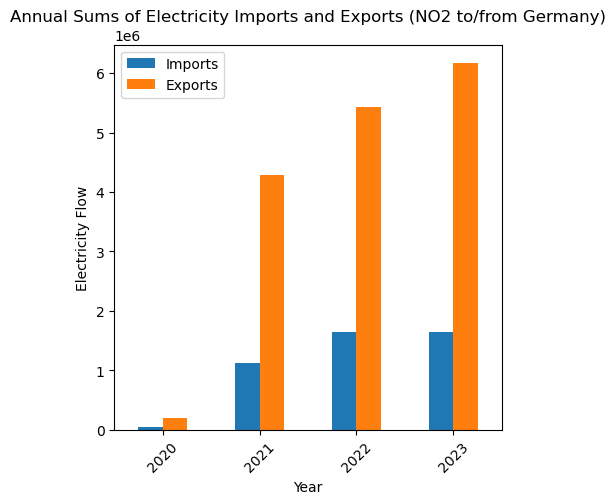

In [75]:
#Creating the figure and defining the size of it
fig, ax = plt.subplots(figsize=(5, 5))
combined_data.plot(kind='bar', ax=ax)

#Setting the x-label as 'Year'
ax.set_xlabel("Year")
#Setting the y-label as 'Electricity Flow'
ax.set_ylabel("Electricity Flow")
#Setting the title of the figure
ax.set_title("Annual Sums of Electricity Imports and Exports (NO2 to/from Germany)")
#Creating a legend to make the code more readable
ax.legend(["Imports", "Exports"])
#
plt.xticks(rotation=45)

**CONCLUSION TASK 3:** NO2 imports more electricity from Germany than it exports. The import level has increased over the last four year, while the level of export did increase between 2020 and 2021, it has stayed relatively still after that. 

**TASK 4**

In [78]:
#reseting index for later use
df_flow_all = df_flow_all.reset_index()

# filtering norway to germany 
imports = df_flow_all[(df_flow_all['InMapCode'] == 'NO2') & (df_flow_all['OutMapCode'] == 'DE_LU')]

# filtering germany to norway
exports = df_flow_all[(df_flow_all['InMapCode'] == 'DE_LU') & (df_flow_all['OutMapCode'] == 'NO2')]

In [79]:
# converting norway to germany dataframe to weekly

exports['DateTime'] = pd.to_datetime(exports['DateTime'])

exports_W = exports.pivot_table(index=[pd.Grouper(key = 'DateTime', freq = 'W'), 'InMapCode', 'OutMapCode'], values = 'FlowValue', aggfunc='sum').reset_index()

/var/folders/r1/xqw50x815rb7zn47zmj1190w0000gn/T/ipykernel_22804/3925882759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports['DateTime'] = pd.to_datetime(exports['DateTime'])


In [80]:
#converting germany to norway dataframe to weekly

imports_W = imports.pivot_table(index=[pd.Grouper(key = 'DateTime', freq = 'W'), 'InMapCode', 'OutMapCode'], values = 'FlowValue', aggfunc='sum').reset_index()


In [81]:
# merging the two dataframes

merged_df = pd.merge(exports_W, imports_W, on = ['DateTime'], suffixes = ('_export', '_import'))


# removing NaNs

merged_df.fillna(0, inplace= True) 


# creating netflow column

merged_df['NetFlow'] = merged_df['FlowValue_export'] - merged_df['FlowValue_import']

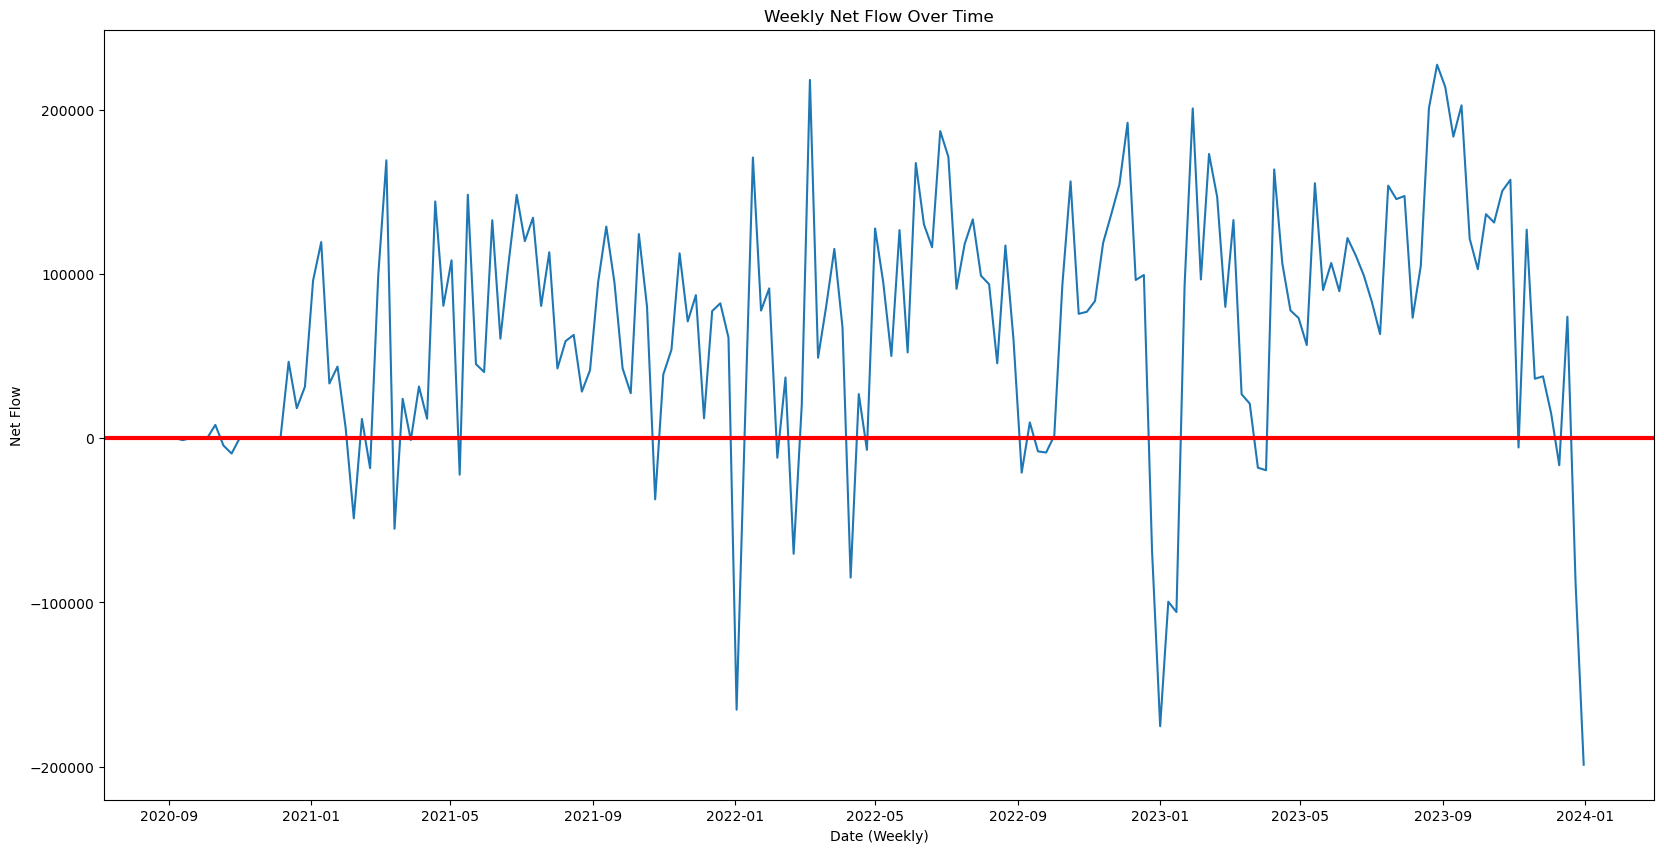

In [82]:
# ensuring merged dataframe is in datetime format
merged_df['DateTime'] = pd.to_datetime(merged_df['DateTime'])

# plotting the graph and adding labels

plt.figure(figsize = (20,10))

plt.plot(merged_df['DateTime'], merged_df['NetFlow'], linestyle = '-')

plt.title('Weekly Net Flow Over Time')
plt.xlabel('Date (Weekly)')
plt.ylabel('Net Flow')
plt.axhline(color = 'red', linewidth = 3)
plt.show()

**CONCLUSION TASK 4:** The graph shows that NO2 is a net exporter of electricity for the vast majority of the weeks from 2020 to the end of 2023. however, it also indicates that at certain times of the year NO2 imported more electricity than it exported (indicated by the negative spikes). The pattern shows that NO2 imports more electricity between the last month of the year and the first 5 months of the following year. A possibe explanation for this pattern is that during the winter, rivers tend to slow down or stop flowing. Therefore, since the majority of electricity produced in norway comes from hydropower (dependant on waterflow), the production of electricity during this period is decreased and NO2 has to depend on the import of electricity to sustain itself.

**TASK 5**

**TASK 6**

To solve this task, we used different online sources. Mostly we used generative AI, in our case ChatGPT and CoPilot. Both are great tools for dissecting the tasks, for coming up with ideas for codes and for giving feedback to error messages. Based on them, it is easier to know where to start and find well-functioning codes on your own. 
Pages such as (…) was also helpful in terms of understanding formulas and codes. 
(Parts of the code copied from the internet?)
